# Import Package and Read Data

In [1]:
import pandas as pd

# plot
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import random
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 25)

In [2]:
# Read  training and test data
train = pd.read_csv('ProjectTrainingData.csv')
test = pd.read_csv('ProjectTestData.csv')

# Brief Overview and Description (Train&Test)

In [3]:
# About 30M training data and 13M test data
print(train.shape)
print(test.shape)

(31991090, 24)
(13015341, 23)


In [4]:
# First 5 rows of  training data
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157


In [5]:
# Descriptive statistics of training data
train.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07
mean,9.222850e+18,1.698903e-01,1.410251e+07,1.004971e+03,2.939784e-01,1.018130e+00,3.284549e-01,1.858369e+04,3.188418e+02,6.016075e+01,2.080636e+03,1.432229e+00,2.218796e+02,5.363977e+04,8.055030e+01
std,5.325227e+18,3.755364e-01,2.675669e+02,1.115785e+00,5.104750e-01,5.406309e-01,8.561166e-01,4.977359e+03,2.156021e+01,4.756263e+01,6.098611e+02,1.323205e+00,3.496583e+02,4.992806e+04,6.698771e+01
min,5.211594e+11,0.000000e+00,1.410210e+07,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00
25%,4.611571e+18,0.000000e+00,1.410222e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.661500e+04,3.200000e+02,5.000000e+01,1.800000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01
50%,9.223074e+18,0.000000e+00,1.410251e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.015300e+04,3.200000e+02,5.000000e+01,2.299000e+03,2.000000e+00,3.900000e+01,1.000550e+05,6.100000e+01
75%,1.383506e+19,0.000000e+00,1.410280e+07,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.177000e+04,3.200000e+02,5.000000e+01,2.506000e+03,3.000000e+00,1.690000e+02,1.000940e+05,9.100000e+01
max,1.844674e+19,1.000000e+00,1.410292e+07,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.383600e+04,1.024000e+03,1.024000e+03,2.729000e+03,3.000000e+00,1.959000e+03,1.002480e+05,2.530000e+02


In [6]:
# First 5 rows of test data
test.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,3295858251275419735,14102809,1005,1,85f751fd,c4e18dd6,50e219e0,1dc72b4d,2347f47a,0f2161f8,cd915ca3,834cff24,0d8ce284,1,0,8334,300,50,761,3,175,100075,23
1,12281702837842634283,14103120,1007,0,85f751fd,c4e18dd6,50e219e0,8311368f,1dc9b529,0f2161f8,ec0aff16,6f6d6456,6fe5a545,1,2,24303,320,50,2788,3,295,100194,240
2,4638380339534007785,14103109,1005,0,4e7614cf,c1aa3c04,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,bd807c39,a2f15940,1,0,24165,320,50,2776,0,35,-1,79
3,17039804736879076347,14103101,1002,0,48c42b43,de0f0f82,50e219e0,ecad2386,7801e8d9,07d7df22,dfb9b781,5ce9f91d,a0215413,0,0,23438,320,50,2684,2,1327,-1,52
4,5753064066292192109,14103119,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,0da60c14,5096d134,1,0,24084,320,50,2761,2,35,100148,13


In [7]:
# Descriptive statistics of test data
test.describe()

,id,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.301534e+07,1.301534e+07,1.301534e+07,1.301534e+07,1.301534e+07,1.301534e+07,1.301534e+07,1.301534e+07,1.301534e+07,1.301534e+07,1.301534e+07,1.301534e+07,1.301534e+07,1.301534e+07
mean,9.223718e+18,1.410288e+07,1.004967e+03,2.462825e-01,1.006340e+00,3.536481e-01,2.048630e+04,3.194561e+02,5.976233e+01,2.316581e+03,1.388272e+00,2.253101e+02,5.226684e+04,9.335834e+01
std,5.326120e+18,3.051849e+02,9.829727e-01,4.845275e-01,4.582598e-01,8.665138e-01,4.530735e+03,2.350921e+01,4.634691e+01,5.653348e+02,1.327725e+00,3.270714e+02,5.000977e+04,8.186552e+01
min,1.398959e+12,1.410210e+07,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00
25%,4.610782e+18,1.410281e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.925100e+04,3.200000e+02,5.000000e+01,2.104000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01
50%,9.225027e+18,1.410301e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.222100e+04,3.200000e+02,5.000000e+01,2.545000e+03,2.000000e+00,3.900000e+01,1.000280e+05,5.200000e+01
75%,1.383742e+19,1.410311e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.356000e+04,3.200000e+02,5.000000e+01,2.681000e+03,3.000000e+00,2.970000e+02,1.001110e+05,2.120000e+02
max,1.844674e+19,1.410312e+07,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.434900e+04,1.024000e+03,1.024000e+03,2.793000e+03,3.000000e+00,1.839000e+03,1.002480e+05,2.550000e+02


In [10]:
# The date and hour ads displayed in training data: Oct21@12am - Oct29@11pm
print(min(train.hour))
print(max(train.hour))

14102100
14102923


In [12]:
# The date and hour ads displayed in test data Oct21@12am - Oct31@11pm  <Two more days than training data>
print(min(test.hour))
print(max(test.hour))

14102100
14103123


In [4]:
# Date- Train
train['hour'] = train['hour'].astype('int') 
train['date'] = round((train.hour - 14100000)/100).astype('int')

# Hour - Train
train.hour = train.hour - 14100000 - train.date * 100


# Date - Test
test['hour'] = test['hour'].astype('int') 
test['date'] = round((test.hour - 14100000)/100).astype('int')

# Hour - Test
test.hour = test.hour - 14100000 - test.date * 100

# Look at Categories Level 

In [68]:
# Column names for reference - Train
train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'date'],
      dtype='object')

In [5]:
# Change to categorical variables - Train
for i in range(0, 25):
        train.iloc[:, i] = train.iloc[:, i].astype('category') 

In [17]:
# Look at number of categories in each variable - Train
# 0: ID , 11: device_id,12: device_ipis - too many categories need exclude variables
# 5: site_id, 6: site_domain, 8: app_id, 9: app_domain, 13: device_model, 16: C14, 19: C17, 22: C20 - need combine levels
for i in range(0, 25):
        print(i, len(train.iloc[:, i].unique()) )

0 31991090
1 2
2 24
3 7
4 7
5 4581
6 7341
7 26
8 8088
9 526
10 36
11 2296165
12 5762925
13 8058
14 5
15 4
16 2465
17 8
18 9
19 407
20 4
21 66
22 171
23 55
24 9


In [18]:
# Get unique categories with value counts within each variable - Train
for i in range(0, 25):
        print(i, train.iloc[:, i].value_counts()) 

0 1.844674e+19    1
6.148604e+18    1
6.148606e+18    1
6.148606e+18    1
6.148607e+18    1
6.148607e+18    1
6.148608e+18    1
6.148609e+18    1
6.148609e+18    1
6.148609e+18    1
6.148609e+18    1
6.148609e+18    1
6.148609e+18    1
6.148610e+18    1
6.148610e+18    1
6.148610e+18    1
6.148611e+18    1
6.148613e+18    1
6.148613e+18    1
6.148613e+18    1
6.148614e+18    1
6.148614e+18    1
6.148615e+18    1
6.148617e+18    1
6.148617e+18    1
6.148618e+18    1
6.148619e+18    1
6.148620e+18    1
6.148621e+18    1
6.148606e+18    1
               ..
1.229529e+19    1
1.229529e+19    1
1.229528e+19    1
1.229527e+19    1
1.229527e+19    1
1.229527e+19    1
1.229527e+19    1
1.229528e+19    1
1.229528e+19    1
1.229528e+19    1
1.229528e+19    1
1.229528e+19    1
1.229528e+19    1
1.229528e+19    1
1.229528e+19    1
1.229528e+19    1
1.229529e+19    1
1.229528e+19    1
1.229528e+19    1
1.229528e+19    1
1.229528e+19    1
1.229528e+19    1
1.229528e+19    1
1.229528e+19    1
1.229528

11 a99f214a    26317545
c357dbff       17428
936e92fb       11075
0f7c61dc       10505
afeffc18        7529
28dc8687        3627
987552d1        3357
d857ffbb        3333
cef4c8cc        3055
b09da1c4        2931
03559b29        1937
02da5312        1775
d2e4c0ab        1277
f1d9c744        1246
abab24a7        1225
096a6f32        1224
73b81e30        1049
bbcf14e4        1047
eec6d022        1011
9af87478         941
e8343327         866
c35f5168         858
bea61865         831
0a04637d         823
ea04480e         804
2c112522         751
4e05554e         740
3c19ea8f         722
bc8b6d57         721
bc335145         702
              ...   
9815a113           1
9815bc64           1
98145336           1
981447ac           1
98133bd2           1
98143885           1
9813520d           1
9813650a           1
98136ec4           1
981386da           1
98139150           1
98139a9d           1
9813a885           1
9813a8b6           1
9813b54b           1
9813baac           1
9813ce9d  

23 23     6944756
79     3892320
221    3795849
71     1838744
48     1788573
157    1640576
61     1620765
32     1448806
33     1184446
52      957067
42      873525
15      672715
51      552895
212     537736
43      510649
117     370987
13      328047
156     295987
68      284296
16      260620
159     256209
95      205855
46      198339
69      155497
91      145919
111     123983
70      113352
90      107877
110     107168
204      81817
171      76413
17       74100
101      65651
112      65141
82       57667
100      52346
178      44362
182      43987
108      41350
35       41234
253      26044
251      15396
116      13760
194      12381
20       11812
94       10992
93       10957
126       6895
102       6490
163       5729
177       4981
195       3457
1         2695
219       1428
85         447
Name: C21, dtype: int64
24 22    4714508
28    4672604
21    3643416
23    3419381
26    3389326
29    3386052
25    2971666
24    2946054
27    2848083
Name: date, dtype: 

In [22]:
# Column names for reference - Test
test.columns

Index(['id', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'date'],
      dtype='object')

In [6]:
# Change variables to categorical variables - Test
for i in range(0, 24):
        test.iloc[:, i] = test.iloc[:, i].astype('category') 

In [20]:
# Look at number of categories in each variable - Test
# 0: ID , 10: device_id,11: device_ipis - too many categories need exclude variables
# 4: site_id, 5: site_domain, 7: app_id, 8: app_domain, 12: device_model, 15: C14, 18: C17, 21: C20 - need combine 
# 15: C14, 18: C17, 20: C19, 22: C21, 23: Date - More levels than in training data
for i in range(0, 24):     
        print(i, len(test.iloc[:, i].unique())) 

0 13015338
1 24
2 7
3 7
4 3951
5 5268
6 25
7 6629
8 395
9 31
10 1020427
11 3215738
12 6990
13 5
14 4
15 2773
16 8
17 9
18 472
19 4
20 68
21 170
22 62
23 11


In [21]:
# Get unique categories within each variable
for i in range(0, 24):
        print(i, test.iloc[:, i].value_counts()) 

0 6916863350654568532     2
280069113251505481      2
12664393798693263915    2
6148806053336295876     1
6148827131398947348     1
6148825270081999408     1
6148824812440761280     1
6148824408377677249     1
6148823578834160599     1
6148822040720220096     1
6148817998787755439     1
6148815748948322255     1
6148808421915581027     1
6148805329624883202     1
6148831486985791279     1
6148805259027567571     1
6148804953632702355     1
6148803161251579434     1
6148802873810402855     1
6148800484588440393     1
6148799425796181949     1
6148797751328482861     1
6148797014492297245     1
6148796871492064626     1
6148796429462947850     1
6148829348950893381     1
18446743486797673703    1
6148796263723011238     1
6148834735563407807     1
6148868728388578772     1
                       ..
12299268868482772470    1
12299268662635443098    1
12299267713168061055    1
12299267245690518189    1
12299267029721938155    1
12299295391615537609    1
12299295973396253117    1
1229929598

10 a99f214a    10982464
0f7c61dc       10851
afeffc18        4483
936e92fb        3481
3cdb4052        2617
c357dbff        2239
987552d1        1202
02da5312        1098
1de30ee7        1064
b09da1c4        1060
03559b29         984
cef4c8cc         920
d857ffbb         855
9af87478         696
a5cd53ed         671
0069fcd3         560
bcf28145         559
0eb29c64         503
93cb7907         489
28dc8687         474
c61ad92d         442
9c2c3afd         436
6784a088         416
44ab35bd         411
243bd3ab         393
a09e10b9         390
bba1945c         360
0339dd70         355
315fe708         336
d5eec38b         330
              ...   
9cf7127b           1
9cf6f33a           1
9cf6d05f           1
9cf91a59           1
9cf9f9c0           1
9cfbcd1c           1
9cfb5a77           1
9cfbcc3d           1
9cfb9d16           1
9cfb888b           1
9cfb828d           1
9cfb81a2           1
9cfb76e5           1
9cfb6e9f           1
9cfb6cb6           1
9cfb672b           1
9cfb66c9  

# Look into unseen test categories 

In [58]:
# Detailed unseen levels counts in test data - C14 
category = train.iloc[:, 16].unique()
allcategory =test.iloc[:,15].unique()
diff = np.setdiff1d(allcategory, category)
Table = pd.DataFrame(columns = ['level','count'])
Table['level'] = diff

for i in range(0, len(diff)):
    Table.iloc[i,1] = test[test.C14 == diff[i]].shape[0]

Table

,level,count
0,7647,1
1,7648,1
2,7655,1
3,17219,199
4,17220,197
5,17221,5
6,17222,1
7,18920,3497
8,18921,5
9,18922,242


In [59]:
# Detailed unseen levels counts in test data - C17
category = train.iloc[:, 19].unique()
allcategory =test.iloc[:,18].unique()
diff = np.setdiff1d(allcategory, category)
Table = pd.DataFrame(columns = ['level','count'])
Table['level'] = diff

for i in range(0, len(diff)):
    Table.iloc[i,1] = test[test.C17 == diff[i]].shape[0]

Table

,level,count
0,1969,402
1,2150,4033
2,2191,1
3,2652,5671
4,2700,2247
5,2701,60625
6,2704,2
7,2719,94
8,2726,406539
9,2730,3489


In [61]:
# Detailed unseen levels counts in test data - C19
category = train.iloc[:, 21].unique()
allcategory =test.iloc[:,20].unique()
diff = np.setdiff1d(allcategory, category)
Table = pd.DataFrame(columns = ['level','count'])
Table['level'] = diff

for i in range(0, len(diff)):
    Table.iloc[i,1] = test[test.C19 == diff[i]].shape[0]

Table

,level,count
0,803,406539
1,1199,857
2,1575,22461


In [62]:
# Detailed unseen levels counts in test data - C21
category = train.iloc[:, 23].unique()
allcategory =test.iloc[:,22].unique()
diff = np.setdiff1d(allcategory, category)
Table = pd.DataFrame(columns = ['level','count'])
Table['level'] = diff

for i in range(0, len(diff)):
    Table.iloc[i,1] = test[test.C21 == diff[i]].shape[0]
    
Table

,level,count
0,76,148381
1,104,8425
2,184,1
3,229,406539
4,240,196767
5,246,248599
6,255,5687


In [63]:
# Detailed unseen levels counts in test data - Date
category = train.iloc[:, 24].unique()
allcategory =test.iloc[:,23].unique()
diff = np.setdiff1d(allcategory, category)
Table = pd.DataFrame(columns = ['level','count'])
Table['level'] = diff

for i in range(0, len(diff)):
    Table.iloc[i,1] = test[test.date == diff[i]].shape[0]
    
Table

,level,count
0,30,4218938
1,31,4577464


# Y variable - "Click" Distribution

In [67]:
# Percentage of click and non-click - Train
count_click = len(train[train['click']==1])
print("click", count_click)
count_noclick = len(train[train['click']==0])
print("noclick", count_noclick)
pct_click = count_click/(count_click+count_noclick)
print("percentage of click", pct_click*100)
pct_noclick = count_noclick/(count_click+count_noclick)
print("percentage of no click", pct_noclick*100)

click 5434977
noclick 26556113
percentage of click 16.989033509017666
percentage of no click 83.01096649098233


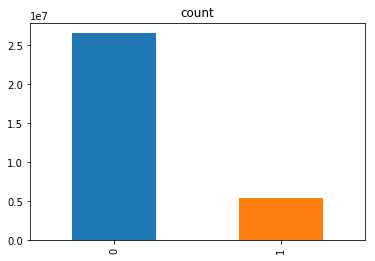

In [65]:
#  Distribution of click - Train
count = train["click"].value_counts()
count.plot(kind = "bar", title = "count")

# Y Vairblae - "Click" Distribution by Varaible

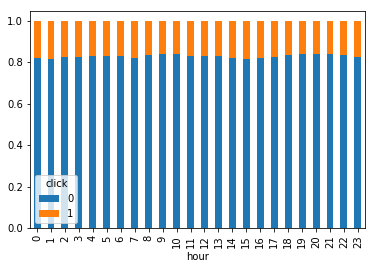

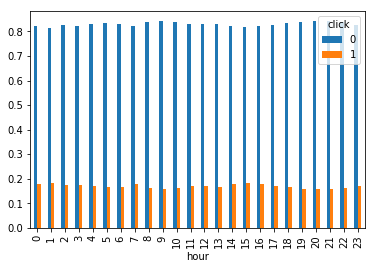

In [74]:
# Hour
y_table = pd.crosstab(train.iloc[:,2],train.click)
y_table.div(y_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
y_table.div(y_table.sum(1).astype(float), axis=0).plot(kind='bar')

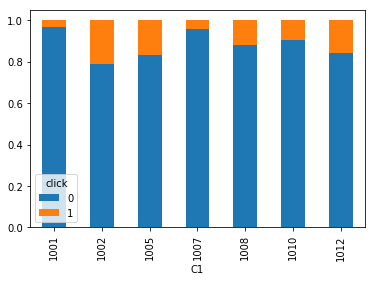

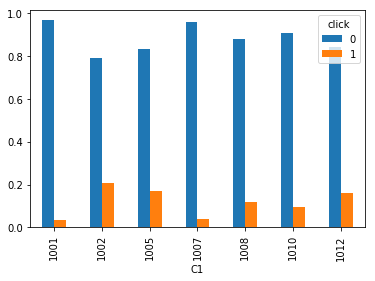

In [77]:
# C1
y_table = pd.crosstab(train.iloc[:,3],train.click)
y_table.div(y_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
y_table.div(y_table.sum(1).astype(float), axis=0).plot(kind='bar')

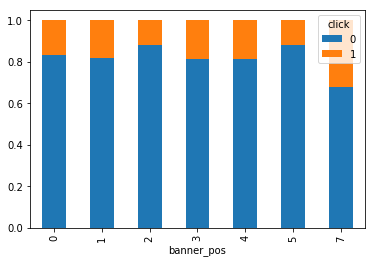

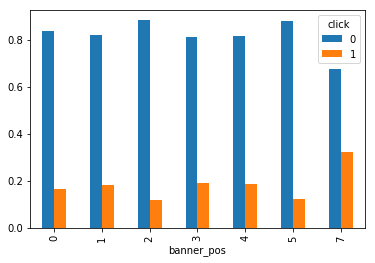

In [78]:
# Banner_pos
y_table = pd.crosstab(train.iloc[:,4],train.click)
y_table.div(y_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
y_table.div(y_table.sum(1).astype(float), axis=0).plot(kind='bar')

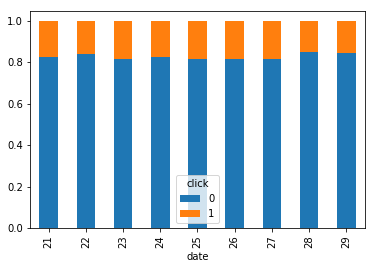

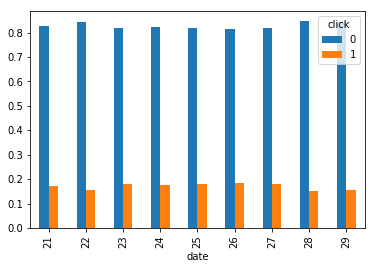

In [76]:
# Date
y_table = pd.crosstab(train.iloc[:,24],train.click)
y_table.div(y_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
y_table.div(y_table.sum(1).astype(float), axis=0).plot(kind='bar')